In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split 

In [3]:
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D, MaxPool2D, AveragePooling2D, Flatten, Dropout, BatchNormalization

In [4]:
os.chdir('E:\Data Science Machine Learning Study\Deep Learning Projects\Traffic_Sign_Detection')

# Storing Data, Label in the List

In [5]:
data = []
labels = []

# 43 classes we have
classes = 43
curr_path = os.getcwd()

In [6]:
curr_path

'E:\\Data Science Machine Learning Study\\Deep Learning Projects\\Traffic_Sign_Detection'

# Preprocessing the images

In [7]:
for i in range(classes):
    path = os.path.join(curr_path, 'Train', str(i))
    images = os.listdir(path)
    for a in images:
        try:
            img = Image.open(path + '\\' + a)
            img = img.resize((30,30))
            img = np.array(img)
            data.append(img)
            labels.append(i)
        except Exception:
            print("Error in image processing")

In [8]:
data = np.array(data)
labels = np.array(labels)

In [9]:
labels

array([ 0,  0,  0, ..., 42, 42, 42])

# Save Data and Label for Future Use

In [10]:
os.mkdir('training')

np.save('./training/data', data)
np.save('./training/target', labels)

# Load Data and Label

In [11]:
data = np.load('./training/data.npy')
labels = np.load('./training/target.npy')

In [12]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


## Spliting into training and testing data

In [13]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size= 0.25, random_state= 42)

In [14]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(29406, 30, 30, 3) (9803, 30, 30, 3) (29406,) (9803,)


In [15]:
X_train[110]

array([[[49, 60, 55],
        [49, 59, 52],
        [52, 60, 53],
        ...,
        [64, 65, 60],
        [60, 59, 56],
        [57, 55, 50]],

       [[53, 62, 58],
        [49, 57, 53],
        [51, 58, 54],
        ...,
        [60, 62, 56],
        [59, 60, 56],
        [57, 55, 50]],

       [[47, 58, 55],
        [42, 52, 50],
        [42, 51, 49],
        ...,
        [60, 61, 50],
        [59, 60, 51],
        [61, 60, 52]],

       ...,

       [[44, 46, 36],
        [48, 51, 39],
        [54, 56, 42],
        ...,
        [63, 66, 54],
        [63, 67, 59],
        [56, 63, 56]],

       [[44, 46, 37],
        [43, 46, 37],
        [49, 50, 38],
        ...,
        [57, 57, 46],
        [62, 63, 55],
        [56, 61, 54]],

       [[51, 54, 46],
        [47, 51, 42],
        [46, 48, 37],
        ...,
        [59, 56, 46],
        [66, 63, 55],
        [64, 65, 57]]], dtype=uint8)

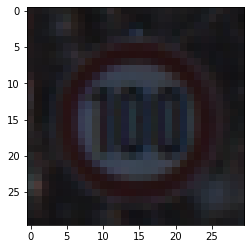

In [16]:
img = X_train[5400]
plt.imshow(img, cmap='gray');

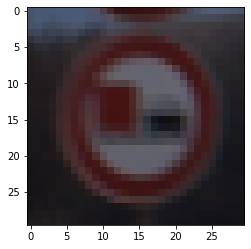

In [17]:
img_ = X_test[3350]
plt.imshow(img_, cmap='gray');

## Encoding the Labels (one-hot encoding)

In [18]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [19]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [20]:
X_train[0]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.99607843, 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.64705884, 0.6745098 , 0.7176471 ],
        [0.7254902 , 0.7372549 , 0.7490196 ],
        [0.81960785, 0.84705883, 0.84313726],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[0.6862745 , 0.7137255 , 0.7647059 ],
        [0.67058825, 0.7137255 , 0.76862746],
        [0.5803922 , 0

In [21]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# Mdel Building

In [22]:
from keras.optimizers import Adam

In [23]:
input_shape=X_train.shape[1:]
input_shape

(30, 30, 3)

In [24]:
# model building
def build_model():
    model = Sequential()
    model.add(Conv2D(filters = 32, kernel_size = (5,5), strides=(1,1), padding='same', activation='relu', input_shape = (30,30,3)))
    model.add(Conv2D(filters = 32, kernel_size = (5,5), strides=(1,1), padding='same', activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(rate=0.25))
    model.add(Conv2D(filters = 64, kernel_size= (3,3), strides=(1,1), padding='same', activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(rate=0.25))
    model.add(Conv2D(filters = 64, kernel_size= (3,3), strides=(1,1), padding='same', activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Flatten())

    # Fully Connected Layer
    model.add(Dense(units= 256, activation='relu'))
    model.add(Dropout(rate=0.25))

    # Output Layer
    model.add(Dense(units = 43, activation='softmax'))

    optimizers = Adam(learning_rate = 0.001)

    model.compile(optimizer = optimizers, loss = 'categorical_crossentropy', metrics = ['accuracy'])

    return model

In [25]:
model_1 = build_model()
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                    

In [26]:
epochs = 10
history = model_1.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/10
919/919 [==============================] - 101s 109ms/step - loss: 1.5542 - accuracy: 0.5478 - val_loss: 0.3187 - val_accuracy: 0.9178
Epoch 2/10
919/919 [==============================] - 90s 98ms/step - loss: 0.2731 - accuracy: 0.9134 - val_loss: 0.0817 - val_accuracy: 0.9791
Epoch 3/10
919/919 [==============================] - 103s 112ms/step - loss: 0.1516 - accuracy: 0.9523 - val_loss: 0.0953 - val_accuracy: 0.9706
Epoch 4/10
919/919 [==============================] - 105s 115ms/step - loss: 0.1050 - accuracy: 0.9670 - val_loss: 0.0434 - val_accuracy: 0.9895
Epoch 5/10
919/919 [==============================] - 105s 115ms/step - loss: 0.0850 - accuracy: 0.9742 - val_loss: 0.0398 - val_accuracy: 0.9891
Epoch 6/10
919/919 [==============================] - 111s 120ms/step - loss: 0.0741 - accuracy: 0.9778 - val_loss: 0.0340 - val_accuracy: 0.9914
Epoch 7/10
919/919 [==============================] - 115s 125ms/step - loss: 0.0693 - accuracy: 0.9776 - val_loss: 0.0231 - v

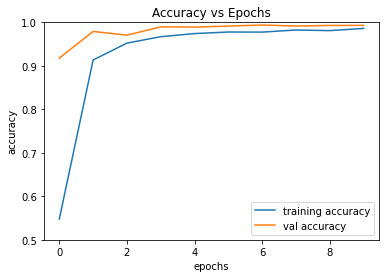

In [27]:
# Accuracy
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim([0.5, 1])
plt.title('Accuracy vs Epochs')
plt.legend()
plt.show();


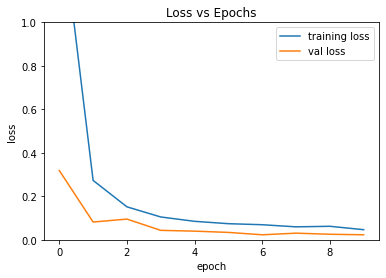

In [28]:
# Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.ylim([0, 1])
plt.title('Loss vs Epochs')
plt.legend()
plt.show();


### Changing Parameters for better performance

In [29]:
def build_model_2():
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
    model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(rate=0.25))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(rate=0.25))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(rate=0.5))

    model.add(Dense(43, activation='softmax'))
    
    optimizers = Adam(learning_rate = 0.001)

    model.compile(optimizer = optimizers, loss = 'categorical_crossentropy', metrics = ['accuracy'])

    return model

In [30]:
model_2 = build_model_2()
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        2432      
                                                                 
 conv2d_5 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 11, 11, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 11, 11, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 7, 7, 64)          36928     
                                                      

In [31]:
epochs = 10
history = model_2.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/10
919/919 [==============================] - 72s 78ms/step - loss: 1.3011 - accuracy: 0.6283 - val_loss: 0.1775 - val_accuracy: 0.9488
Epoch 2/10
919/919 [==============================] - 72s 78ms/step - loss: 0.2426 - accuracy: 0.9261 - val_loss: 0.0764 - val_accuracy: 0.9794
Epoch 3/10
919/919 [==============================] - 73s 79ms/step - loss: 0.1511 - accuracy: 0.9548 - val_loss: 0.0436 - val_accuracy: 0.9885
Epoch 4/10
919/919 [==============================] - 76s 83ms/step - loss: 0.1142 - accuracy: 0.9668 - val_loss: 0.0369 - val_accuracy: 0.9901
Epoch 5/10
919/919 [==============================] - 72s 79ms/step - loss: 0.0955 - accuracy: 0.9699 - val_loss: 0.0379 - val_accuracy: 0.9903
Epoch 6/10
919/919 [==============================] - 73s 80ms/step - loss: 0.0843 - accuracy: 0.9749 - val_loss: 0.0229 - val_accuracy: 0.9936
Epoch 7/10
919/919 [==============================] - 70s 76ms/step - loss: 0.0713 - accuracy: 0.9793 - val_loss: 0.0203 - val_accuracy:

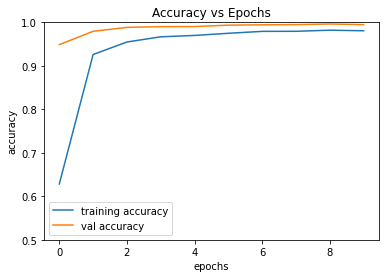

In [32]:
# Accuracy
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.ylim([0.5, 1])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Accuracy vs Epochs')
plt.legend()
plt.show();

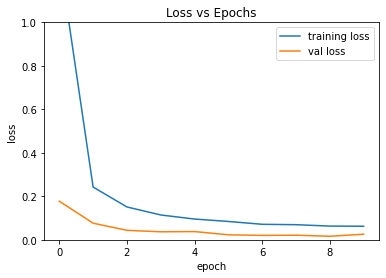

In [33]:
# Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.ylim([0, 1])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss vs Epochs')
plt.legend()
plt.show();

# Performance with Image Augmentation - Model_2

In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [35]:
def build_model_3():
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(30,30,3)))
    model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(BatchNormalization(axis=-1))
    
    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(BatchNormalization(axis=-1))
    
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(rate=0.5))
    
    model.add(Dense(43, activation='softmax'))
    
    optimizers = Adam(learning_rate = 0.001)

    model.compile(optimizer = optimizers, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [36]:
augImage = ImageDataGenerator(
            rotation_range=15,
            width_shift_range=0.1,
            height_shift_range=0.1,
            shear_range=0.1,
            horizontal_flip=False,
            vertical_flip=False,
            zoom_range=0.1)

In [37]:
model_3 = build_model_3()

In [38]:
epochs = 10
history = model_3.fit(augImage.flow(X_train, y_train, batch_size=32), epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/10
919/919 [==============================] - 68s 73ms/step - loss: 1.3670 - accuracy: 0.6258 - val_loss: 0.2341 - val_accuracy: 0.9240
Epoch 2/10
919/919 [==============================] - 66s 72ms/step - loss: 0.2779 - accuracy: 0.9167 - val_loss: 0.0315 - val_accuracy: 0.9913
Epoch 3/10
919/919 [==============================] - 67s 73ms/step - loss: 0.1490 - accuracy: 0.9547 - val_loss: 0.0599 - val_accuracy: 0.9830
Epoch 4/10
919/919 [==============================] - 65s 71ms/step - loss: 0.1130 - accuracy: 0.9653 - val_loss: 0.0516 - val_accuracy: 0.9821
Epoch 5/10
919/919 [==============================] - 55s 59ms/step - loss: 0.0867 - accuracy: 0.9738 - val_loss: 0.0117 - val_accuracy: 0.9966
Epoch 6/10
919/919 [==============================] - 55s 60ms/step - loss: 0.0774 - accuracy: 0.9763 - val_loss: 0.0181 - val_accuracy: 0.9948
Epoch 7/10
919/919 [==============================] - 55s 59ms/step - loss: 0.0721 - accuracy: 0.9771 - val_loss: 0.0132 - val_accuracy:

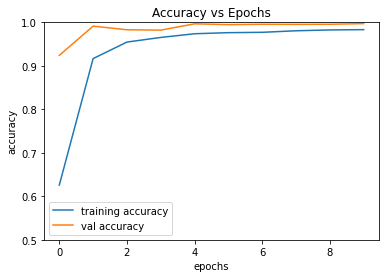

In [39]:
# Accuracy
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.ylim([0.5, 1])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Accuracy vs Epochs')
plt.legend()
plt.show();

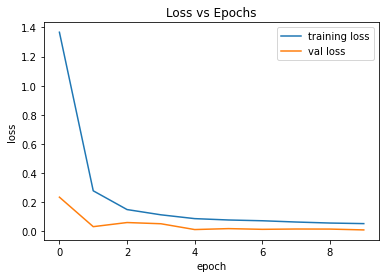

In [40]:
# Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')

plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss vs Epochs')
plt.legend()
plt.show();

# Check Performace on Test Data

#### Processing the Test Data

In [41]:
test_df = pd.read_csv('Train.csv')
test_df.shape

(39209, 8)

In [42]:
test_df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [43]:
label = test_df['ClassId'].values
imgs = test_df['Path'].values
test_data = []

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    test_data.append(np.array(image))
X_test = np.array(test_data)

In [44]:
X_test

array([[[[ 46,  51,  56],
         [ 48,  51,  56],
         [ 49,  51,  54],
         ...,
         [ 50,  49,  49],
         [ 50,  50,  51],
         [ 46,  49,  49]],

        [[ 47,  51,  56],
         [ 47,  49,  54],
         [ 48,  50,  54],
         ...,
         [ 53,  50,  50],
         [ 55,  55,  54],
         [ 46,  50,  50]],

        [[ 48,  51,  56],
         [ 46,  48,  52],
         [ 47,  49,  53],
         ...,
         [ 59,  54,  53],
         [ 61,  62,  60],
         [ 47,  53,  52]],

        ...,

        [[ 47,  52,  55],
         [ 50,  52,  56],
         [ 52,  53,  55],
         ...,
         [ 95,  83,  64],
         [ 91,  82,  63],
         [ 71,  65,  50]],

        [[ 49,  53,  56],
         [ 53,  55,  59],
         [ 53,  54,  58],
         ...,
         [108,  98,  71],
         [ 95,  93,  64],
         [ 72,  76,  57]],

        [[ 51,  52,  55],
         [ 54,  55,  60],
         [ 53,  55,  59],
         ...,
         [114, 112,  77],
        

#### Test using Model_1

In [45]:
# Prediction on test data using model_1
y_pred = model_1.predict(X_test)
y_pred

1226/1226 [==============================] - 25s 20ms/step


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [46]:
label

array([20, 20, 20, ..., 42, 42, 42], dtype=int64)

In [47]:
pred_label = np.argmax(y_pred, axis = -1)

In [48]:
from sklearn.metrics import accuracy_score
print(accuracy_score(label, pred_label))

0.9687826774465046


#### Test using Model_2

In [49]:
y_pred = model_2.predict(X_test)

label_pred = np.argmax(y_pred, axis=-1)

print(accuracy_score(label, label_pred))

1226/1226 [==============================] - 15s 12ms/step
0.9910734780280038


#### Test using Model_3

In [50]:
y_pred = model_3.predict(X_test)

label_pred = np.argmax(y_pred, axis=-1)

print(accuracy_score(label, label_pred))

1226/1226 [==============================] - 13s 10ms/step
0.9203499196613023


### Select and Save the best model

Hence we can see that model 2 shows the best performance than othe two models in both of training , validation and testing fage, we are going to save model_2

In [51]:
# Save model_2 for future use
model_2.save('./training/TSR_model.h5')

# Load the Model

In [52]:
from keras.models import load_model
model = load_model('./training/TSR_model.h5')

In [53]:
# Classes of trafic signs
# These are given in the meta folder of the dataset
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [54]:
def model_test_on_img(img):
    data = []
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test = np.array(data)
    y_pred = model.predict(X_test)
    label_pred = np.argmax(y_pred, axis=-1)
    img_class = classes[label_pred[0]]
    return image, img_class

In [55]:
model_test_on_img(r'E:\Data Science Machine Learning Study\Deep Learning Projects\Traffic_Sign_Detection\Test\00032.png')

1/1 [==============================] - 0s 91ms/step


(<PIL.Image.Image image mode=RGB size=30x30 at 0x1A81D1AA9D0>,
 'Turn left ahead')

1/1 [==============================] - 0s 16ms/step
Turn left ahead


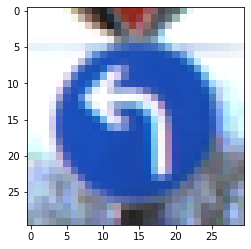

In [56]:
# Test on a random image
img, predicted_class = model_test_on_img(r'E:\Data Science Machine Learning Study\Deep Learning Projects\Traffic_Sign_Detection\Test\00032.png')

# print predicted class
print(predicted_class)

# show the selected image
plt.imshow(img)
plt.show();

1/1 [==============================] - 0s 31ms/step
Right-of-way at intersection


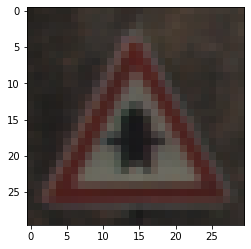

In [57]:
# Test on a random image
img, predicted_class = model_test_on_img(r'.\Test\00004.png')

# print predicted class
print(predicted_class)

# show the selected image
plt.imshow(img)
plt.show();